In [1]:
import os
import sys

path = os.path.abspath('')
print(path)
sys.path.append('../')

# os.path.dirname( __file__ )
sys.path.pop() 
sys.path.append(os.path.abspath(os.path.join(path, '../..')))

from copy import deepcopy

import numpy as np
import torch

from epde.preprocessing.smoothers import ANNSmoother

/home/maslyaev/Documents/EPDE/projects/control


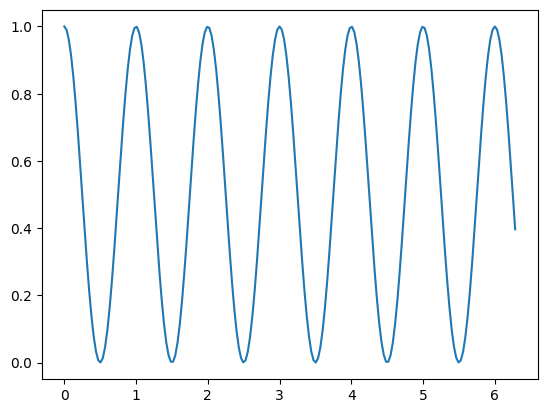

In [2]:
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 200)
ampl = 0.5; period = 1; phase_shift = 0.25
plt.plot(x, ampl*(np.sin(2*np.pi/period*(x + phase_shift)) + 1))

In [3]:
x = np.linspace(0, 2*np.pi, 100)
y = np.linspace(0, 2*np.pi, 100)
XX, YY = np.meshgrid(x, y)
u = np.sin(XX+YY)

In [4]:
import matplotlib.pyplot as plt
from epde.preprocessing.deriv_calculators import Heatmap

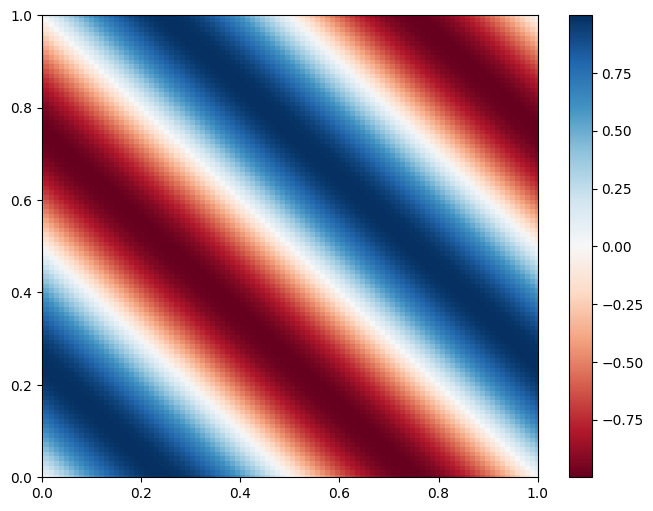

In [5]:
Heatmap(u)

In [6]:
smoother = ANNSmoother()
res = smoother(data = u, grid = [XX, YY], epochs_max=5*1e3, return_ann = True)

Surface training t=0, loss=0.6378478705883026
Surface training t=1, loss=0.635776549577713
Surface training t=2, loss=0.6347223818302155
Surface training t=3, loss=0.6331444978713989
Surface training t=4, loss=0.6314787864685059
Surface training t=5, loss=0.6300959587097168
Surface training t=6, loss=0.6284195482730865
Surface training t=7, loss=0.6265237629413605
Surface training t=8, loss=0.624579906463623
Surface training t=9, loss=0.6225422322750092
Surface training t=10, loss=0.6202502846717834
Surface training t=11, loss=0.6177339255809784
Surface training t=12, loss=0.6150815486907959
Surface training t=13, loss=0.612239271402359
Surface training t=14, loss=0.6093122065067291
Surface training t=15, loss=0.6059524416923523
Surface training t=16, loss=0.6025297939777374
Surface training t=17, loss=0.599061518907547
Surface training t=18, loss=0.5950869023799896
Surface training t=19, loss=0.5911135375499725
Surface training t=20, loss=0.5869432687759399
Surface training t=21, loss

/home/maslyaev/Documents/EPDE/epde/preprocessing/smoothers.py:99: UserWarning: Returning ANN from smoother. This should not occur anywhere, except selected experiments.
  warn('Returning ANN from smoother. This should not occur anywhere, except selected experiments.')


In [18]:
layered_params = [(idx, p, type(p)) for idx, p in enumerate(res[1].parameters())]
params = layered_params[0][1]

In [30]:
params.grad

tensor([[-1.1809e-01, -2.8114e-01],
        [-7.5018e-01, -1.1211e+00],
        [-5.9852e-02, -3.6599e-02],
        [ 2.0301e-01,  1.7528e-01],
        [-1.7295e-01, -3.0821e-01],
        [-3.8424e-03, -5.4334e-03],
        [-1.7247e-01, -4.2710e-01],
        [-5.5338e-02, -3.0550e-02],
        [-1.9974e-02, -2.1920e-02],
        [-2.6025e-01, -4.0271e-01],
        [ 1.7441e-01,  4.6249e-01],
        [ 7.4787e-04,  2.4114e-04],
        [ 4.2476e-02,  3.5793e-02],
        [-3.4949e-01, -1.5695e-01],
        [-4.2850e-02, -1.3471e-01],
        [-1.4245e-03, -1.1251e-03],
        [-2.1952e-01, -1.2486e-01],
        [ 1.8997e+00,  2.0811e+00],
        [-4.1302e-01, -4.0205e-01],
        [-6.2612e-01, -3.4193e-01],
        [ 5.4775e-01,  6.0807e-01],
        [-2.1261e-01, -1.5422e-01],
        [ 6.8466e-01,  6.8965e-01],
        [-3.6085e-02, -1.1315e-02],
        [ 5.6481e+00,  4.8681e+00],
        [ 1.1029e+00,  3.3481e-01],
        [ 4.7248e-02,  1.1788e-02],
        [-3.1017e-01, -1.567

In [6]:
grid = [XX, YY]
tgrid = torch.from_numpy(np.array([subgrid.reshape(-1) for subgrid in grid])).float().T

In [7]:
op_vals = res[1](tgrid)[..., 0]
op_vals.shape

torch.Size([10000])

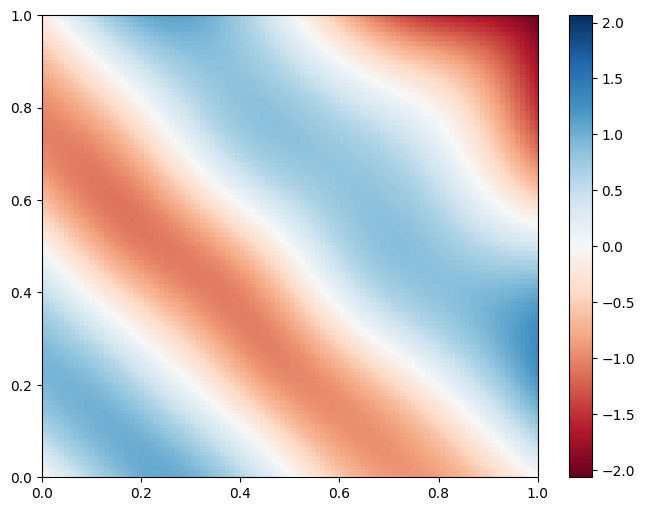

In [8]:
Heatmap(op_vals.detach().numpy().reshape(XX.shape))

In [14]:
tgrid.requires_grad = True
op_vals = res[1](tgrid)[..., 0].sum(0)
op_vals_dot = torch.autograd.grad(outputs = op_vals, inputs = tgrid)

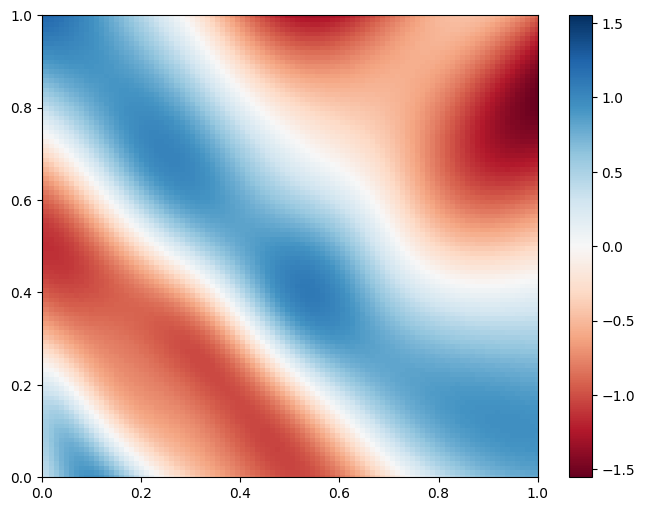

In [19]:
Heatmap(op_vals_dot[0].detach().numpy()[:, 0].reshape((100, 100)))